<h2><b>[개인 과제]</b></h2>

````
# 미국 Boston 지역의 집값 data 불러오기
import pandas as pd
house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book-2nd-edition'
                     '/master/code/ch10/housing.data.txt',header=None,sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house.head()
````


<h3>Ridge, Lasso, ElasticNet을 사용해 alpha의 값 변화에 따른 MEDV를 예측하는 변수들의 계수 변화를 시각화해보세요.</h3>

[<h3>참고 코드</h3>](https://datascienceschool.net/03%20machine%20learning/06.05%20%EC%A0%95%EA%B7%9C%ED%99%94%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.html)



<br>

**<h3><조건></h3>**

<h3>1. X(독립변수 data)에 Standard Scaler 적용하기 </h3>

<br>

**<h3><참고></h3>**

<h3>Ridge와 Lasso에서 상수항이 축소되지 않는 이유</h3>

[<h3>참고 블로그</h3>](https://rpago.tistory.com/59)


In [1]:
# 미국 Boston 지역의 집값 data 불러오기
import pandas as pd
house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book-2nd-edition'
                     '/master/code/ch10/housing.data.txt',header=None,sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
# The normal imports
import numpy as np # efficient numerical computations
import pandas as pd # data structures for data analysis
from numpy.random import randn

# These are the plotting modules adn libraries
import matplotlib as mpl # plotting (both interactive and to files)
import matplotlib.pyplot as plt
import seaborn as sns # extra plot types, elegant and readable plot style

# machine learning algorithms, dataset access
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, r2_score, mean_squared_error
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, RANSACRegressor, ElasticNet, Ridge, Lasso

sns.set_style('whitegrid')

# Command so that plots appear in the iPython Notebook
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
# 독립 변수, 종속 변수 지정
X=house.iloc[:,:-1]
y=house.iloc[:,-1]
# 정규화(Category 변수인 CHAS와 RAD 제외 후 전체 독립변수 dataset에 대해 Scaling 진행.)
X.columns.to_list()
X_dropped=X.drop(columns=['CHAS','RAD'])

scaler=MinMaxScaler()
#scaler=StandardScaler()
scaler.fit(X_dropped)
X_dropped=scaler.transform(X_dropped)
#a=pd.DataFrame(X_dropped)
#print(a.max(axis=0))
#print(a.min(axis=0))
#print(a)

In [4]:
#X_full=np.concatenate((X_dropped,np.array(X[['CHAS','RAD']])),axis=1)
#X_full.shape

In [5]:
coef=[]

from sklearn.linear_model import Ridge
for a in [0.001,0.01,0.1,1,10]:
  clf=Ridge(alpha=a)
  clf.fit(X_dropped,y)
  coef.append(clf.coef_)

print(coef)
coef_Lasso=pd.DataFrame(coef).T
coef_Lasso.columns=[[0.001,0.01,0.1,1,10]]
coef_Lasso

[array([ -6.23478053,   3.98821067,  -1.14534982,  -7.08398124,
        21.85652242,  -0.18113314, -16.52372556,   0.43608252,
        -8.21393393,   3.50682406, -19.08841571]), array([ -6.21563185,   3.98173006,  -1.14611664,  -7.06917834,
        21.8389538 ,  -0.17895037, -16.49228254,   0.43048515,
        -8.2140369 ,   3.50712722, -19.08606818]), array([ -6.03197615,   3.91878553,  -1.1544455 ,  -6.9248081 ,
        21.6654717 ,  -0.15829781, -16.18557049,   0.37596844,
        -8.21476804,   3.50983819, -19.06026092]), array([ -4.74664162,   3.43354882,  -1.27519712,  -5.77193773,
        20.11828406,  -0.03888988, -13.71978293,  -0.06361267,
        -8.1978116 ,   3.5145284 , -18.64138375]), array([ -2.20817768,   2.27288396,  -2.13390022,  -2.59108404,
        12.3810979 ,  -0.47308504,  -5.65958588,  -1.83989562,
        -7.30444622,   3.16887792, -13.42247442])]


,0.001,0.010,0.100,1.000,10.000
0,-6.234781,-6.215632,-6.031976,-4.746642,-2.208178
1,3.988211,3.981730,3.918786,3.433549,2.272884
2,-1.145350,-1.146117,-1.154446,-1.275197,-2.133900
3,-7.083981,-7.069178,-6.924808,-5.771938,-2.591084
4,21.856522,21.838954,21.665472,20.118284,12.381098
5,-0.181133,-0.178950,-0.158298,-0.038890,-0.473085
6,-16.523726,-16.492283,-16.185570,-13.719783,-5.659586
7,0.436083,0.430485,0.375968,-0.063613,-1.839896
8,-8.213934,-8.214037,-8.214768,-8.197812,-7.304446
9,3.506824,3.507127,3.509838,3.514528,3.168878


In [6]:
# alpha 값에 따른 계수 변화(Ridge)
coef=[]

from sklearn.linear_model import Ridge
for a in [0.001,0.01,0.1,1,10]:
  clf=Ridge(alpha=a)
  clf.fit(X_dropped,y)
  coef.append(clf.coef_)

print(coef)
coef_Ridge=pd.DataFrame(coef).T
coef_Ridge.columns=[[0.001,0.01,0.1,1,10]]
coef_Ridge

[array([ -6.23478053,   3.98821067,  -1.14534982,  -7.08398124,
        21.85652242,  -0.18113314, -16.52372556,   0.43608252,
        -8.21393393,   3.50682406, -19.08841571]), array([ -6.21563185,   3.98173006,  -1.14611664,  -7.06917834,
        21.8389538 ,  -0.17895037, -16.49228254,   0.43048515,
        -8.2140369 ,   3.50712722, -19.08606818]), array([ -6.03197615,   3.91878553,  -1.1544455 ,  -6.9248081 ,
        21.6654717 ,  -0.15829781, -16.18557049,   0.37596844,
        -8.21476804,   3.50983819, -19.06026092]), array([ -4.74664162,   3.43354882,  -1.27519712,  -5.77193773,
        20.11828406,  -0.03888988, -13.71978293,  -0.06361267,
        -8.1978116 ,   3.5145284 , -18.64138375]), array([ -2.20817768,   2.27288396,  -2.13390022,  -2.59108404,
        12.3810979 ,  -0.47308504,  -5.65958588,  -1.83989562,
        -7.30444622,   3.16887792, -13.42247442])]


,0.001,0.010,0.100,1.000,10.000
0,-6.234781,-6.215632,-6.031976,-4.746642,-2.208178
1,3.988211,3.981730,3.918786,3.433549,2.272884
2,-1.145350,-1.146117,-1.154446,-1.275197,-2.133900
3,-7.083981,-7.069178,-6.924808,-5.771938,-2.591084
4,21.856522,21.838954,21.665472,20.118284,12.381098
5,-0.181133,-0.178950,-0.158298,-0.038890,-0.473085
6,-16.523726,-16.492283,-16.185570,-13.719783,-5.659586
7,0.436083,0.430485,0.375968,-0.063613,-1.839896
8,-8.213934,-8.214037,-8.214768,-8.197812,-7.304446
9,3.506824,3.507127,3.509838,3.514528,3.168878


In [7]:
# alpha 값에 따른 계수 변화(Lasso)
coef=[]

from sklearn.linear_model import Lasso
for a in [0.001,0.01,0.1,1,10]:
  clf=Lasso(alpha=a)
  clf.fit(X_dropped,y)
  coef.append(clf.coef_)

print(coef)
coef_Lasso=pd.DataFrame(coef).T
coef_Lasso.columns=[[0.001,0.01,0.1,1,10]]
coef_Lasso

[array([ -6.0230915 ,   3.95448974,  -1.08189168,  -6.99751534,
        21.83510073,  -0.15082734, -16.33696556,   0.34314705,
        -8.18953108,   3.49128639, -19.1185444 ]), array([ -4.49688311,   3.48993584,  -0.7468958 ,  -6.39314464,
        21.61408921,  -0.        , -14.70794528,  -0.        ,
        -8.15468785,   3.42305508, -19.32411817]), array([ -0.        ,   0.        ,  -0.        ,  -0.        ,
        19.23784061,  -0.        ,  -1.77678308,  -0.9002925 ,
        -7.47349414,   2.41707007, -19.53925954]), array([-0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -1.1899473 , -0.        ,  0.        ,
       -7.56782472]), array([-0.,  0., -0., -0.,  0., -0.,  0., -0., -0.,  0., -0.])]


,0.001,0.010,0.100,1.000,10.000
0,-6.023092,-4.496883,-0.000000,-0.000000,-0.0
1,3.954490,3.489936,0.000000,0.000000,0.0
2,-1.081892,-0.746896,-0.000000,-0.000000,-0.0
3,-6.997515,-6.393145,-0.000000,-0.000000,-0.0
4,21.835101,21.614089,19.237841,0.000000,0.0
5,-0.150827,-0.000000,-0.000000,-0.000000,-0.0
6,-16.336966,-14.707945,-1.776783,0.000000,0.0
7,0.343147,-0.000000,-0.900293,-1.189947,-0.0
8,-8.189531,-8.154688,-7.473494,-0.000000,-0.0
9,3.491286,3.423055,2.417070,0.000000,0.0


In [8]:
# alpha 값에 따른 계수 변화(ElasticNet)
coef=[]

from sklearn.linear_model import ElasticNet
for a in [0.001,0.01,0.1,1,10]:
  clf=ElasticNet(alpha=a)
  clf.fit(X_dropped,y)
  coef.append(clf.coef_)

print(coef)
coef_Elastic=pd.DataFrame(coef).T
coef_Elastic.columns=[[0.001,0.01,0.1,1,10]]
coef_Elastic

[array([ -5.65294509,   3.80317531,  -1.14171331,  -6.65284929,
        21.36757788,  -0.11338276, -15.60614007,   0.24476249,
        -8.20287513,   3.5051321 , -19.02024408]), array([ -3.27556662,   2.7872831 ,  -1.41756304,  -4.37070016,
        17.93392475,  -0.        , -10.48385462,  -0.6436804 ,
        -8.08739307,   3.43259877, -17.67529089]), array([-0.82347466,  1.59538523, -2.21141072, -1.6294149 ,  7.29638629,
       -0.83850795, -1.26653953, -2.66018527, -5.5773948 ,  2.32126664,
       -8.8732457 ]), array([-0.        ,  0.24762978, -0.75743097, -0.45441758,  0.56247448,
       -0.53449815,  0.        , -1.15689494, -0.84619689,  0.17669319,
       -1.31738671]), array([-0.,  0., -0., -0.,  0., -0.,  0., -0., -0.,  0., -0.])]


,0.001,0.010,0.100,1.000,10.000
0,-5.652945,-3.275567,-0.823475,-0.000000,-0.0
1,3.803175,2.787283,1.595385,0.247630,0.0
2,-1.141713,-1.417563,-2.211411,-0.757431,-0.0
3,-6.652849,-4.370700,-1.629415,-0.454418,-0.0
4,21.367578,17.933925,7.296386,0.562474,0.0
5,-0.113383,-0.000000,-0.838508,-0.534498,-0.0
6,-15.606140,-10.483855,-1.266540,0.000000,0.0
7,0.244762,-0.643680,-2.660185,-1.156895,-0.0
8,-8.202875,-8.087393,-5.577395,-0.846197,-0.0
9,3.505132,3.432599,2.321267,0.176693,0.0


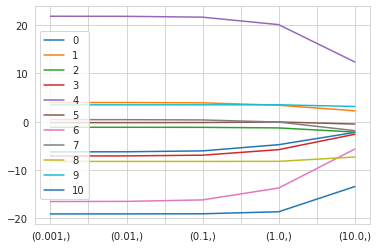

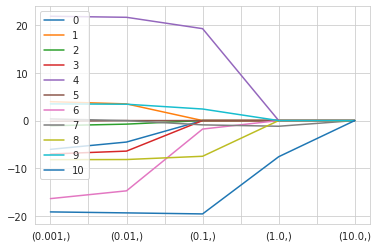

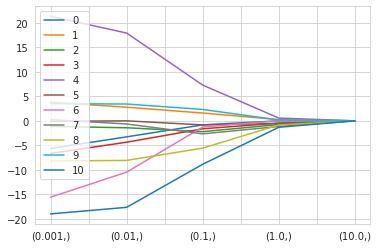

In [9]:
# 시각화
coef_Ridge.T.plot()
coef_Lasso.T.plot()
coef_Elastic.T.plot()